<img src=http://pngimg.com/uploads/diamond/diamond_PNG6702.png width="100"/>

# <center> Linear regression model for Diamond price prediction</center>
<center>$y=bx+c$</center>
<center>$\hat{y}=y+\epsilon$</center>

<center><img src=https://i.imgur.com/DT4H1Yk.jpg width="400"/></center>

In [103]:
%reset -f
import warnings                    
warnings.filterwarnings("ignore")# To ignore the warnings

## Importing the libraries

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [105]:
dataset = pd.read_csv('diamond.csv')

In [106]:
dataset.shape

(6000, 8)

In [107]:
dataset.dtypes

Carat Weight    float64
Cut              object
Color            object
Clarity          object
Polish           object
Symmetry         object
Report           object
Price             int64
dtype: object

In [108]:
dataset.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


## Data Overview

- **Carat Weight:** The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip
- **Cut:** One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)
- **Color:** One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)
- **Clarity:** One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)
- **Polish:** One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
- **Symmetry:** One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
- **Report:** One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities
- **Price:** The amount in USD that the diamond is valued `Target Column`

,Cut,Color,Clarity,Polish,Symmetry,Report
count,6000,6000,6000,6000,6000,6000
unique,5,6,7,4,4,2
top,Ideal,G,SI1,EX,VG,GIA
freq,2482,1501,2059,2425,2417,5266


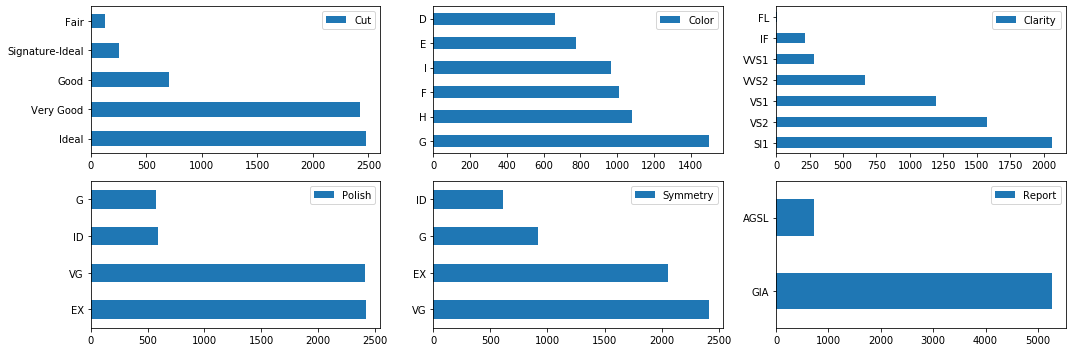

In [109]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,5))
dataset['Cut'].value_counts().plot(kind='barh',ax=axes[0,0],legend=True)
dataset['Color'].value_counts().plot(kind='barh',ax=axes[0,1],legend=True)
dataset['Clarity'].value_counts().plot(kind='barh',ax=axes[0,2],legend=True)
dataset['Polish'].value_counts().plot(kind='barh',ax=axes[1,0],legend=True)
dataset['Symmetry'].value_counts().plot(kind='barh',ax=axes[1,1],legend=True)
dataset['Report'].value_counts().plot(kind='barh',ax=axes[1,2],legend=True)
plt.tight_layout()
dataset[['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry','Report']].describe()

In [110]:
dataset.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


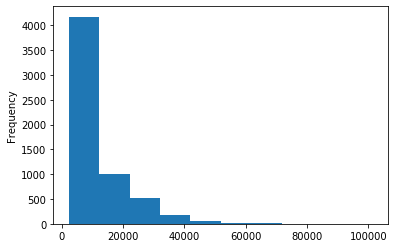

In [111]:
dataset.Price.plot(kind="hist")

## Label Encoding

In [112]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [113]:
dataset[['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry','Report']]=dataset[['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry','Report']].apply(le.fit_transform)

In [114]:
dataset.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,1,5169
1,0.83,2,4,3,2,2,0,3470
2,0.85,2,4,2,0,0,1,3183
3,0.91,2,1,2,3,3,1,4370
4,0.83,2,3,2,0,0,1,3171


In [115]:
X = dataset.iloc[:, :-1].values #Features
y = dataset.iloc[:, -1].values # Label

In [116]:
X

array([[1.1 , 2.  , 4.  , ..., 3.  , 0.  , 1.  ],
       [0.83, 2.  , 4.  , ..., 2.  , 2.  , 0.  ],
       [0.85, 2.  , 4.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [1.02, 2.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [1.27, 3.  , 3.  , ..., 0.  , 0.  , 1.  ],
       [2.19, 2.  , 1.  , ..., 0.  , 0.  , 1.  ]])

## Splitting the dataset into the Training set and Test set

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=12345)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

In [119]:
# import pickle
# filename = 'model.pkl'
# pickle.dump(model, open(filename, 'wb'))

In [120]:
# import pickle
# model=pickle.load(open("model.pkl", 'rb'))

In [121]:
# model?

In [122]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5347.623956   5042.        ]
 [6302.16026565 5829.        ]
 [7229.40583853 7508.        ]
 ...
 [4932.85558889 4905.        ]
 [5155.9494558  5597.        ]
 [4270.16681139 4074.        ]]


In [55]:
print("R-Square:%.4f\nAdjusted R-Square:%.4f"%(model.score(X_test, y_test),(1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))))

R-Square:0.9702
Adjusted R-Square:0.9701


## Performance evaluation

[`Coefficient of determination`](https://en.wikipedia.org/wiki/Coefficient_of_determination)($R^2$ or $r^2$ and pronounced "R squared") is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

![R-square formula](https://media.geeksforgeeks.org/wp-content/uploads/20190415232942/CodeCogsEqn-10.gif)

$R^2$ is a statistical measure of how well the regression predictions approximate the real data points. An $R^2$ of 1 indicates that the regression predictions perfectly fit the data

Total variance             |  Unexplained variance |
:-------------------------:|:-------------------------:
![Average Fitted Line](https://media.geeksforgeeks.org/wp-content/uploads/20190415230935/average-fitted-model1-300x179.png) | ![Best Fitted Line](https://media.geeksforgeeks.org/wp-content/uploads/20190415232400/best-fitted-model-300x179.png)
![Total variance](http://labs.geog.uvic.ca/geog226/images/Lab9/img_variation.gif)

[**In a linear least squares regression with an intercept term and a single explanator, this is also equal to the squared Pearson correlation coefficient**](https://math.stackexchange.com/questions/129909/correlation-coefficient-and-determination-coefficient/1799567)

![Relationship between R Squared and correlation coefficient](https://i.stack.imgur.com/6gGRR.png)

R-Square:0.9941


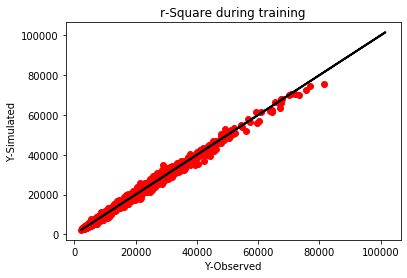

In [56]:
print("R-Square:%.4f"%model.score(X_train, y_train))
plt.scatter(y_train,model.predict(X_train), color = 'red')
plt.plot(y_test,y_test, color = 'black', linewidth = 2)
plt.title('r-Square during training')
plt.xlabel('Y-Observed')
plt.ylabel('Y-Simulated')
plt.show()

In [57]:
from scipy.stats import pearsonr
np.round(pearsonr(y_train,model.predict(X_train))[0]**2,4)

0.9941

R-Square:0.9702


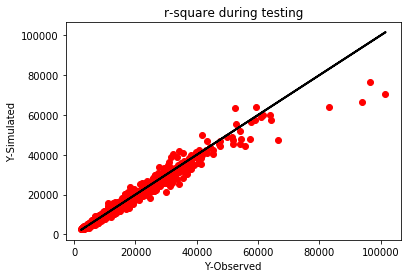

In [58]:
print("R-Square:%.4f"%model.score(X_test, y_test))
plt.scatter(y_test, y_pred, color = 'red')
plt.plot(y_test,y_test, color = 'black', linewidth = 2)
plt.title('r-square during testing')
plt.xlabel('Y-Observed')
plt.ylabel('Y-Simulated')
plt.show()

In [59]:
from scipy.stats import pearsonr
np.round(pearsonr(y_test, y_pred)[0]**2,4)

0.9725

In [60]:
def testRSquare(k):
    X = dataset.iloc[:, :k].values
    y = dataset.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
    model1 = LinearRegression()
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    return(np.round(model1.score(X_test, y_test),4),np.round((1 - (1-model1.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),4))

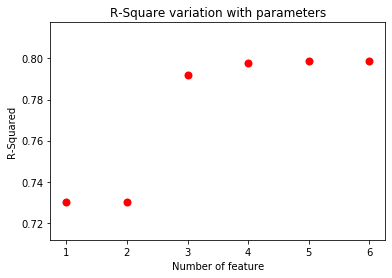

In [61]:
plt.scatter(list(range(1,7)),[testRSquare(i)[0] for i in range(1,7)], color = 'red', linewidth = 2)
plt.title('R-Square variation with parameters')
plt.xlabel('Number of feature')
plt.ylabel('R-Squared')
plt.show()

`Adjusted R-Squared`

![Adjusted R-Square](https://media.geeksforgeeks.org/wp-content/uploads/20190623171003/CodeCogsEqn2.png)

- $R_2$: Coefficent of determination
- n=Number of instance
- k=Number of parameters

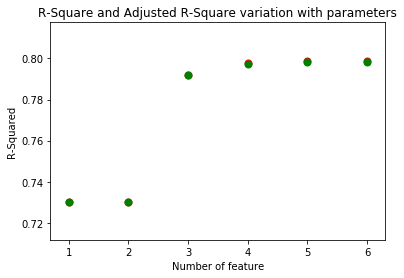

In [62]:
plt.scatter(list(range(1,7)),[testRSquare(i)[0] for i in range(1,7)], color = 'red', linewidth = 2)
plt.scatter(list(range(1,7)),[testRSquare(i)[1] for i in range(1,7)], color = 'green', linewidth = 2)
plt.title('R-Square and Adjusted R-Square variation with parameters')
plt.xlabel('Number of feature')
plt.ylabel('R-Squared')
plt.show()

In [63]:
pd.DataFrame([[testRSquare(i)[0] for i in range(1,7)],[testRSquare(i)[1] for i in range(1,7)]],index=[["R-Squared","R-Squared adjusted"]]).T

,R-Squared,R-Squared adjusted
0,0.7304,0.7303
1,0.7304,0.7301
2,0.7920,0.7917
3,0.7978,0.7974
4,0.7985,0.7980
5,0.7989,0.7983


Note: R-Squared adjusted < R-Squared

In [25]:
# SS_Residual = sum((y-yhat)**2)       
# SS_Total = sum((y-np.mean(y))**2)     
# r_squared = 1 - (float(SS_Residual))/SS_Total
# adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)